We want to extend the boundary a bit to the upper left to show that points of higher steepness than that of H4 can be obtained.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
#load the points checked for one of the matrices with parameters within [10^-7, 10^7]
#corresponding alphashape:
ashape=np.load("./ashapes/ashape_N4Pb1000_7_2022_3_14.npy")
datafolder="/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2022_03_04__N4Pol_anybasalP1000_6_7/tocheck_N4Pb1000"
data=pd.read_csv(os.path.join(datafolder,"mat_N4Pb1000_7_checked2.out"),sep=",|;",engine="python")
pos=data["pos"].values
stp=data["rho"].values
parsets=data.values[:,2:]

101 81


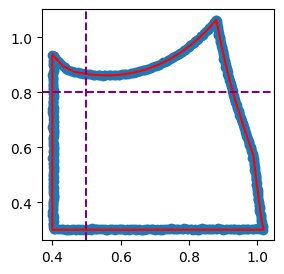

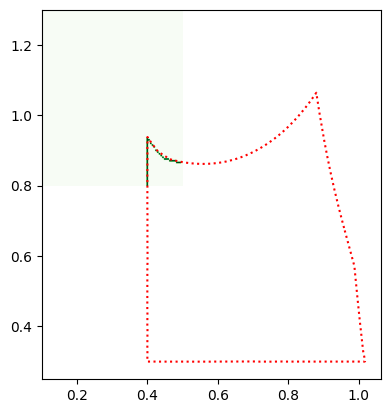

In [5]:
#in order to extend the wing, we are going to fill one matrix, from pos=[0.1,0.5], stp=[0.8,1.3]
step=0.005

        
newposu=np.arange(0.1,0.5+step,step)
newstpu=np.arange(0.8,1.3+step,step)
nrow=len(newstpu)
ncol=len(newposu)
print(nrow,ncol)
points_u=np.zeros((nrow,ncol))
mat_pars_u=np.zeros((nrow,ncol,30))
for i in range(len(pos)):
    if pos[i]<newposu[-1] and stp[i]>newstpu[0]:
        p=pos[i]
        s=stp[i]
        i_p=np.where(p>newposu)[0][-1]
        i_s=np.where(s>newstpu)[0][-1]
        points_u[i_s,i_p]=1
        mat_pars_u[i_s,i_p]=parsets[i].copy()


fig,ax=plt.subplots(1,1,figsize=(3,3))
ax.scatter(pos,stp)
ax.plot(ashape[0],ashape[1],color="r")
#visualize the new grid limits
#upper left
ax.axvline(newposu[-1],color="purple",linestyle="--")
ax.axhline(newstpu[0],color="purple",linestyle="--")



plt.show()

plt.imshow(points_u,origin="lower",extent=[newposu[0],newposu[-1],newstpu[0],newstpu[-1]],cmap=plt.cm.Greens)
plt.plot(ashape[0],ashape[1],color="r",linestyle=":")
plt.show()

In [8]:
if True:
    
    np.save("matN4Pb1000_ul_limit7.npy",points_u)
    np.save("matN4Pb1000_pars_ul_limit7.npy",mat_pars_u)

In [7]:
for i in range(len(mat_pars_u)):
    for j in range(len(mat_pars_u[0])):
        if np.sum(mat_pars_u[i,j])!=0:
            print(mat_pars_u[i,j])

[8.479629e+06 7.827810e+05 3.687446e+06 1.000000e-07 7.874570e-07
 1.354510e-07 3.286050e-07 1.000000e-07 3.667200e-03 6.416850e+04
 1.148780e-03 4.919134e+06 2.517287e+06 1.195830e-07 1.000000e-07
 3.309630e-04 2.582410e-07 1.000000e-07 1.000000e-07 7.737040e-07
 1.000000e-07 2.157990e-01 1.783340e-07 5.558680e-01 1.520190e-07
 4.702510e-05 2.952420e+03 6.894890e-04 3.293750e-07 1.000000e-07]
[1.72822e-03 1.00000e-07 3.37906e-07 1.48259e-06 4.95228e-06 2.04619e-06
 5.71671e-07 6.22342e-04 2.38681e-06 7.73204e-06 3.10176e+01 1.02029e-06
 1.00000e-07 4.09177e+05 4.27562e+05 4.74438e-05 2.35767e-06 1.82118e-06
 1.00000e-07 1.00000e-07 1.00000e-07 2.57949e-03 3.06336e-05 1.00000e-07
 1.00000e-07 7.89823e-06 5.47148e-07 1.00000e-07 6.89443e+04 2.95951e-07]
[1.000000e+07 5.288986e+06 1.555030e-01 1.000000e-07 1.000000e-07
 1.000000e-07 1.538350e-07 1.964260e-06 4.011600e+04 1.040880e+05
 7.671550e-06 8.534916e+06 8.735570e+05 8.715820e-01 1.248530e-03
 2.387610e-03 1.000000e-07 8.890890e+00